# EDA

### Importing and reading the data file

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('../data/raw/airline_sentiment_analysis.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)

In [37]:
df.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


### Data Statistics

In [38]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 11541
Number of columns: 2


In [39]:
df.shape[0]

11541

In [40]:
1541/11541

0.13352395806255957

In [47]:
from sklearn.model_selection import train_test_split

df_folds, test = train_test_split(
            df, test_size=0.13, random_state=42
        )

In [48]:
print(len(df_folds))
print(len(test))

10040
1501


In [6]:
print(f"Number of missing values in each column: {df.isnull().sum()}")

Number of missing values in each column: airline_sentiment    0
text                 0
dtype: int64


So there are 11541 data points, and 2 columns, first is the sentiment column (our target variable), second is the text columns which contains the tweet about the review of the airline.

There is also no missing values.

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

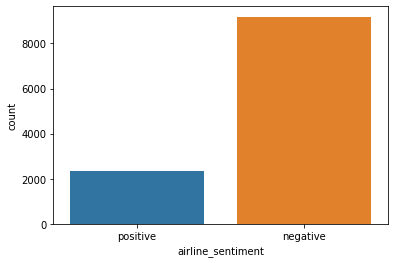

In [7]:
sns.countplot(x='airline_sentiment', data=df)

So this is an imbalanced dataset. Thus we might want to choose our metrics a bit carefully.

In [8]:
df["airline_mentioned"] = df["text"].apply(lambda x: x.split()[0].replace("@", ""))

In [9]:
print(f"Number of unique airlines mentioned: {df.airline_mentioned.nunique()}")

Number of unique airlines mentioned: 197


In [10]:
print(f"The most common airline mentioned is {df.airline_mentioned.value_counts()[:25]}")

The most common airline mentioned is united           2904
USAirways        2394
AmericanAir      2201
SouthwestAir     1678
JetBlue          1349
VirginAmerica     308
United             93
usairways          73
jetblue            28
.united            28
americanair        27
united,            25
southwestair       25
“JetBlue:          20
.AmericanAir       18
SouthwestAir,      14
“united:           14
.JetBlue           13
.USAirways         13
virginamerica      11
“AmericanAir:      11
united.            10
.SouthwestAir       9
I                   9
Thank               8
Name: airline_mentioned, dtype: int64


So there are mainly 6 airlines mentioned USAirways, AmericanAir, SouthwestAir, Jetblue, VirginAmerica, United.

<AxesSubplot:xlabel='airline_mentioned'>

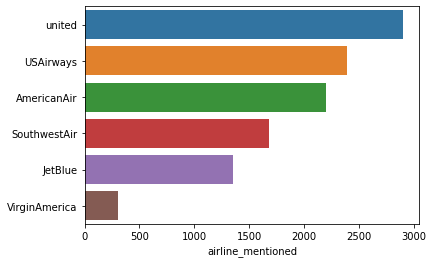

In [11]:
sns.barplot(x = df.airline_mentioned.value_counts()[:6], y = df.airline_mentioned.value_counts()[:6].index)

We will also have to insure that the accuracy for each of these airlines is good enough.

### Incorrect @ Statistics

In [12]:
correct_mentions = sum(df.airline_mentioned.value_counts()[:6])
incorrect_mentions = sum(df.airline_mentioned.value_counts()[6:])

In [13]:
print(f"number of correct airline mentions is {correct_mentions}")
print(f"number of incorrect airline mentions is {incorrect_mentions}")
print(f"% of incorrect airline mentions is { (1 - (incorrect_mentions / correct_mentions)) * 100}")

number of correct airline mentions is 10834
number of incorrect airline mentions is 707
% of incorrect airline mentions is 93.4742477386007


### Text Data Analysis

In [14]:
print(f"% of rows which contain @ symbol is {df[df.text.str.contains('@')].shape[0]/len(df) * 100}%")

% of rows which contain @ symbol is 100.0%


In [15]:
print(f"Number of rows which don't contain @ as their first character: {df[~df.text.str.startswith('@')].shape[0]}")

Number of rows which don't contain @ as their first character: 299


In [16]:
df[~df.text.str.startswith('@')].text.sample(20)

5424    Haha! @JetBlue: Our fleet's on fleek. http://t...
5373    Sir. RT @JetBlue: Our fleet's on fleek. http:/...
9275    “@AmericanAir: @Andrew_Wasila We're sorry you ...
9605    “@AmericanAir: @Dumas2TTG Good morning, Tamara...
3926    &lt;3 &lt;3 RT @SouthwestAir! @danihampton Sor...
8876               Spend 1 HOUR on hold with @USAirways .
5404    “@JetBlue: Our fleet's on fleek. http://t.co/t...
9466    Just got off the phone @AmericanAir customer s...
3081    .@united Will breaking them in somehow make th...
8449    .@USAirways I rebooked myself - but Cancelled ...
9697    .@AmericanAir Alright prove it: (1/3) 3 days a...
9765    Why doesn't @AmericanAir allow for conversatio...
5167    . @SouthwestAir condescension must be a qualit...
8549    .@USAirways I guess from now on I should take ...
1472    “@united: @4geiger It looks like form the phot...
2185    . @united sad that you don't think it is impor...
987     UA3388 @united was Cancelled Flightled not del...
4825    5 hour

In [20]:
df["text_length"] = df.apply(lambda x: len(x.text.split()), axis=1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text_length', ylabel='Density'>

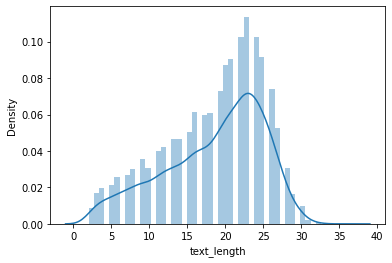

In [32]:
sns.distplot(a=df['text_length'], kde=True, bins=50)

So the 100th percentile of the length of the text is around 36 words.

In [34]:
print(f"Average length of text is {df['text_length'].mean()}")
print(f"Maximum length of text is {df['text_length'].max()}")
print(f"Minimum length of text is {df['text_length'].min()}")

Average length of text is 18.52465124339312
Maximum length of text is 36
Minimum length of text is 2
